<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Caso Final  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="green"> **Objetivo del estudio de caso y resultados de aprendizaje** </FONT>

En este estudio de caso se espera que el estudiante compare diversos métodos para resolver problemas de clasificación. Particularmente.

- Cargar y aplicar las técnicas de limpieza para normalizar un texto.

- Aplicar algunas técnicas de machine learning para clasificación

- Aplicar algunas estructuras de redes neuronales (MLP-LSTM) para clasificación.

- Comparar los resultados.

**objetivo**: dado un conjunto de datos de reviews de vinos, considerar las dos variables: *description* y *variety*. Determinar la variedad del vino a partir de descripción del mismo.



# <FONT SIZE=5 COLOR="green"> **Indicaciones** </FONT>

- Para entregar en grupos de máximo tres integrantes.

- Cargar en la plataforma *e-aulas* los archivos: *.ipynb* y *.pdf*

- Fecha de entrega el día **martes 28 de Noviembre 6:00 p.m.**

- Preparar una presentación de los resultados del caso para el día **miércoles 29 de Noviembre de 2023** en la sesión de clase.

- Entrega de notas: viernes **1 de diciembre**



In [1]:
# ! pip install keras tensorflow transformers sentencepiece wordcloud stop-words -q

In [2]:
# Cargamos las librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import plotly.express as px
import re
import warnings
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from wordcloud import WordCloud
warnings.filterwarnings(action='ignore')

# <FONT SIZE=5 COLOR="bronw"> **Punto 1. Carga y Exploración de los datos** </FONT>

## <FONT SIZE=4 COLOR="blue"> **1. Carga y Exploración de los datos**

Utilizando la librería Pandas, se realiza la carga del conjunto de datos desde el archivo `Wine_Reviews.csv`. Posteriormente, se imprime una descripción breve y esencial del conjunto de datos mediante `data.info()` y `data.describe()`. Permitiendo tener una visión general de la estructura de los datos, incluyendo la cantidad de registros, el tipo de datos en cada columna y estadísticas descriptivas relevantes para columnas numéricas, como la media, desviación estándar, y valores mínimos y máximos.

In [3]:
data = pd.read_csv('data/Wine_Reviews.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


**Agregar una buena descripción de los datos**

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla et rhoncus ligula, varius gravida arcu. Proin vitae massa pharetra, commodo mi quis, bibendum sem. Nunc aliquet magna sit amet massa auctor, et pulvinar leo consectetur. Mauris ullamcorper mi non enim condimentum semper. Integer tempus, orci id ultricies euismod, nunc dui dictum velit, a venenatis tellus nisl vel tellus. Suspendisse vulputate rutrum porttitor. Vestibulum sed leo blandit, posuere ligula vel, varius turpis. Proin erat ipsum, rutrum in orci nec, pharetra blandit nunc. Cras magna orci, dapibus non porttitor et, auctor et lacus. Nunc quis libero neque. 

Nulla dui dolor, pretium vitae malesuada at, ultrices eget nibh. Aenean dapibus iaculis orci, ornare suscipit ex gravida vitae. Donec laoreet eleifend ligula, eu dignissim urna lacinia ac. Donec euismod turpis ex, nec convallis lectus lacinia nec. Fusce vel ipsum ut velit aliquam auctor. Curabitur commodo mollis sem. Proin scelerisque erat sed condimentum imperdiet. Mauris nisi neque, bibendum vitae placerat nec, eleifend nec urna. Lorem ipsum dolor sit amet, consectetur adipiscing elit. 

Concluir con que se eliminaran las demás variables, diferentes a `description` y `variety`.

In [7]:
data = data.drop(columns=['Unnamed: 0', 'country', 'designation', 'points',
                          'price', 'province', 'region_1', 'region_2', 'taster_name',
                          'taster_twitter_handle', 'title', 'winery'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  129971 non-null  object
 1   variety      129970 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


## <FONT SIZE=4 COLOR="blue"> **2. Análisis de la Variable 'variety'**

Se realiza un análisis sobre las variedades de vino presentes en el conjunto de datos, en la columna `variety`. Luego, se utiliza `value_counts()` para calcular la frecuencia de ocurrencia de cada variedad y se seleccionan las 10 variedades más comunes (`variety_counts.head(10)`). Finalmente, se crea un gráfico de barras para visualizar la distribución de estas 10 variedades, permitiendo una comprensión visual rápida de las 10 variedades de vino más prevalentes en el conjunto de datos.

In [8]:
variety_counts = data['variety'].value_counts()
top_10_varieties = variety_counts.head(10).reset_index(name='count')
fig = px.bar(top_10_varieties, x='index', y='count',
              labels={'index': 'Variety', 'count': 'Frequency'},
              title='Top 10 Wine Varieties')
fig.update_xaxes(title_font=dict(size=18), tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=18), tickfont=dict(size=14))
fig.update_layout(title_font=dict(size=20))
fig.show()

**Agregar una buena descripción de la distribución de los datos**

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla et rhoncus ligula, varius gravida arcu. Proin vitae massa pharetra, commodo mi quis, bibendum sem. Nunc aliquet magna sit amet massa auctor, et pulvinar leo consectetur. Mauris ullamcorper mi non enim condimentum semper. Integer tempus, orci id ultricies euismod, nunc dui dictum velit, a venenatis tellus nisl vel tellus. Suspendisse vulputate rutrum porttitor. Vestibulum sed leo blandit, posuere ligula vel, varius turpis. Proin erat ipsum, rutrum in orci nec, pharetra blandit nunc. Cras magna orci, dapibus non porttitor et, auctor et lacus. Nunc quis libero neque. 

Nulla dui dolor, pretium vitae malesuada at, ultrices eget nibh. Aenean dapibus iaculis orci, ornare suscipit ex gravida vitae. Donec laoreet eleifend ligula, eu dignissim urna lacinia ac. Donec euismod turpis ex, nec convallis lectus lacinia nec. Fusce vel ipsum ut velit aliquam auctor. Curabitur commodo mollis sem. Proin scelerisque erat sed condimentum imperdiet. Mauris nisi neque, bibendum vitae placerat nec, eleifend nec urna. Lorem ipsum dolor sit amet, consectetur adipiscing elit. 

## <FONT SIZE=4 COLOR="blue"> **3. Selección y Filtrado de Datos Relevantes**

Se seleccionan las 10 variedades más comunes y se extraen 2000 registros aleatorios de cada una para construir un nuevo conjunto de datos denominado `filtered_data`. Usando esta información, se seleccionan 2000 registros aleatorios por cada variedad de vino, almacenandose en un nuevo conjunto llamado `final_data`. Así, se logra obtener una cantidad equilibrada de muestras de las 10 variedades principales.

In [9]:
top_10_list = top_10_varieties["index"].tolist()
filtered_data = data[data['variety'].isin(top_10_list)]
final_data = pd.DataFrame()
for variety in top_10_list:
    variety_data = filtered_data[filtered_data['variety'] == variety]
    sample = variety_data.sample(n=2000, random_state=1)
    final_data = pd.concat([final_data, sample])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 120724 to 111652
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  20000 non-null  object
 1   variety      20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


## <FONT SIZE=4 COLOR="blue"> **4. Normalización y Almacenamiento de Datos Limpios**

Se lleva a cabo una limpieza de las descripciones de vinos en la columna `description` de `final_data`. Se define una función `clean_description` que realiza operaciones de limpieza en el texto de las descripciones de vinos. Esta función convierte todo el texto a minúsculas, elimina caracteres no alfabéticos y palabras vacías, utilizando la biblioteca `nltk`. Luego, se aplica esta función a la columna `description` y se guarda el resultado en un archivo `clean_descriptions.pickle`. Dejando los datos listos para análisis y modelos de procesamiento de lenguaje natural.

In [10]:
def clean_description(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [11]:
final_data['description'] = final_data['description'].apply(clean_description)
final_data.head(2)

,description,variety
120724,testarossa blends wine grapes sourced multiple...,Pinot Noir
27339,fabulous example light balanced wine santa luc...,Pinot Noir


In [12]:
with open('data/clean_descriptions.pickle', 'wb') as f:
    pickle.dump(final_data, f)

In [13]:
with open('data/clean_descriptions.pickle', 'rb') as f:
    data = pickle.load(f)
data.head(1)

,description,variety
120724,testarossa blends wine grapes sourced multiple...,Pinot Noir


## <FONT SIZE=4 COLOR="blue"> **5. Visualización con Nube de Palabras**

Finalmente, se crea una nube de palabras a partir de las descripciones limpias de vinos, lo que proporciona una representación visual de las palabras más frecuentes en estas descripciones. Para esto se unen todas las descripciones limpias en un solo texto y se utiliza la biblioteca `wordcloud` para generar la visualización. Permitiendo identificar patrones o términos dominantes en los datos.

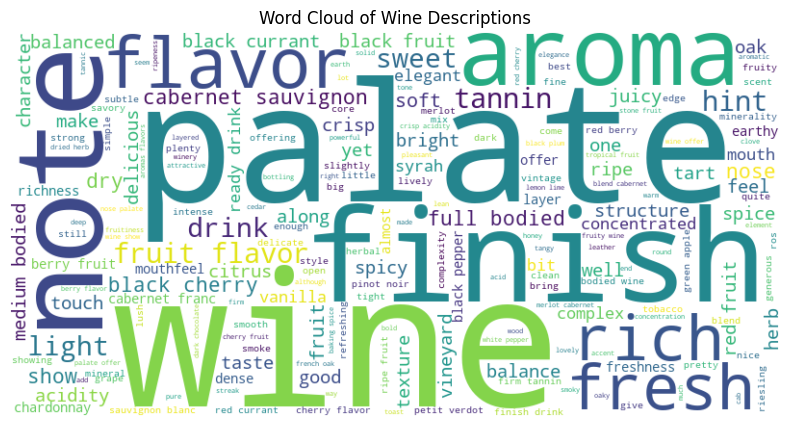

In [14]:
text = ' '.join(data['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Wine Descriptions')
plt.show()

# <FONT SIZE=5 COLOR="bronw"> **Punto 2. Modelos ML and ANN** </FONT>

1. Seleccione dos modelos de machine learning para resolver el problema de clasificación.

2. Aplique MLP (multilayer perceptron) con *Tensorflow-Keras* para generar el modelo.

3. Aplique una estructura de LSTM con *Tensorflow-Keras* para generar el modelo.

4. Evalúe y compare los resultados de los modelos

5. Concluya

## <FONT SIZE=4 COLOR="blue"> **1. Codificación de la Variable Objetivo**

Se lleva a cabo un paso inicial de preprocesamiento al aplicar `LabelEncoder` a la variable categórica `variety` para transformarla en una forma numérica que puede ser interpretada por los modelos.

In [15]:
label_encoder = LabelEncoder()
data['variety_encoded'] = label_encoder.fit_transform(data['variety'])
data.sample(3)

,description,variety,variety_encoded
41543,high toned aromas herb cigar box spice followe...,Cabernet Sauvignon,1
45579,full bodied wine treasure trove flavor complex...,Pinot Noir,4
16578,tastes far expensive price would suggest sourc...,Merlot,3


## <FONT SIZE=4 COLOR="blue"> **2. División de Datos para Entrenamiento y Prueba**

Luego, el conjunto de datos se divide en conjuntos de entrenamiento y prueba mediante `train_test_split` de `Scikit-Learn`. Este paso resulta en la segmentación de las descripciones de vinos (`data['description']`) como las características a utilizar (`X_train`, `X_test`), y las variedades codificadas (`data['variety_encoded']`) como las etiquetas correspondientes (`y_train`, `y_test`).

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data['description'], data['variety_encoded'], test_size=0.2, random_state=0)

## <FONT SIZE=4 COLOR="blue"> **3. Tokenización de los datos**

Se procede a preparar los datos para los modelos. Primero, se emplea la clase `Tokenizer` de Keras para convertir las descripciones de texto en secuencias numéricas. Luego, se ajusta la longitud de las secuencias utilizando `pad_sequences` con el fin de estandarizarlas a una longitud máxima (`max_len`). Para el modelo LSTM, también se especifica un número máximo de palabras (`max_words`).

In [17]:
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

## <FONT SIZE=4 COLOR="blue"> **4. Configuración de los Modelos**

Se definen y entrenan dos modelos distintos de redes neuronales, uno basado en un Perceptrón Multicapa (MLP) y otro en una red neuronal de tipo LSTM (Long Short-Term Memory). Estas arquitecturas son fundamentales en el campo del aprendizaje automático y el procesamiento del lenguaje natural (PLN), cada una con características distintivas que las hacen adecuadas para diferentes tipos de tareas.

El Perceptrón Multicapa (MLP) es un tipo básico de red neuronal artificial en el que las neuronas están dispuestas en capas: una capa de entrada, una o más capas ocultas y una capa de salida. En particular, el modelo MLP está definido utilizando la clase `Sequential` de Keras, con tres capas densas (`Dense`). Las capas densas están totalmente conectadas, lo que significa que cada neurona de una capa está conectada a todas las neuronas de la capa siguiente. Se utilizan funciones de activación ReLU en las capas intermedias para introducir no linealidades y una función de activación softmax en la capa de salida para la clasificación multiclase.

Por otro lado, la red LSTM (Long Short-Term Memory) es un tipo de red neuronal recurrente (RNN) especializada en capturar y recordar dependencias a largo plazo en datos secuenciales. En contraste con las RNN estándar, las LSTM están diseñadas para evitar el problema del desvanecimiento del gradiente, permitiendo que las redes aprendan dependencias temporales más largas. En este caso, el modelo LSTM también utiliza la clase `Sequential` de Keras. Se emplea una capa de `Embedding` para convertir los datos de entrada en vectores densos, seguida de una capa de `SpatialDropout1D` para evitar el sobreajuste en datos secuenciales. La capa `LSTM` principal con dropout y recurrent_dropout ayuda a aprender y recordar patrones complejos en secuencias de datos, seguida de una capa `Dense` con activación softmax para la clasificación de múltiples clases.

Ambos modelos se compilan utilizando el optimizador `adam` y la función de pérdida `sparse_categorical_crossentropy` para la optimización y evaluación del rendimiento durante el entrenamiento. Además, se establece la métrica de precisión (`accuracy`) para evaluar la eficacia de los modelos durante el entrenamiento y la evaluación.

In [18]:
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(max_len,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(10, activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## <FONT SIZE=4 COLOR="blue"> **5. Entrenamiento de los Modelos**

Ahora, se entrenan los modelos MLP y LSTM con los datos de entrenamiento (`X_train_pad`, `y_train`) proporcionados durante 25 épocas, usando lotes de tamaño 32, y también evalúan su desempeño en los datos de prueba. Dichos modelos son guardados en archivos `.h5`, el formato estándar para guardar modelos en Keras.

In [19]:
mlp_history = mlp_model.fit(X_train_pad, y_train, epochs=25, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/25


500/500 [==============================] - 2s 2ms/step - loss: 24.7079 - accuracy: 0.1027 - val_loss: 2.3465 - val_accuracy: 0.0970
Epoch 2/25
500/500 [==============================] - 1s 2ms/step - loss: 2.3160 - accuracy: 0.0997 - val_loss: 2.3309 - val_accuracy: 0.0972
Epoch 3/25
500/500 [==============================] - 1s 2ms/step - loss: 2.3032 - accuracy: 0.0983 - val_loss: 2.3255 - val_accuracy: 0.0975
Epoch 4/25
500/500 [==============================] - 1s 2ms/step - loss: 2.3016 - accuracy: 0.0960 - val_loss: 2.3247 - val_accuracy: 0.0945
Epoch 5/25
500/500 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.0964 - val_loss: 2.3250 - val_accuracy: 0.0945
Epoch 6/25
500/500 [==============================] - 1s 2ms/step - loss: 2.3019 - accuracy: 0.0951 - val_loss: 2.3230 - val_accuracy: 0.0945
Epoch 7/25
500/500 [==============================] - 1s 2ms/step - loss: 2.3016 - accuracy: 0.0983 - val_loss: 2.3236 - val_accuracy: 0.0948
Epo

In [20]:
lstm_history = lstm_model.fit(X_train_pad, y_train, epochs=25, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/25


500/500 [==============================] - 132s 261ms/step - loss: 1.9057 - accuracy: 0.2800 - val_loss: 1.2828 - val_accuracy: 0.4900
Epoch 2/25
500/500 [==============================] - 130s 260ms/step - loss: 1.0304 - accuracy: 0.6180 - val_loss: 0.8973 - val_accuracy: 0.6883
Epoch 3/25
500/500 [==============================] - 130s 260ms/step - loss: 0.7184 - accuracy: 0.7445 - val_loss: 0.8181 - val_accuracy: 0.7128
Epoch 4/25
500/500 [==============================] - 130s 259ms/step - loss: 0.5677 - accuracy: 0.8083 - val_loss: 0.8070 - val_accuracy: 0.7320
Epoch 5/25
500/500 [==============================] - 130s 259ms/step - loss: 0.4727 - accuracy: 0.8423 - val_loss: 0.8141 - val_accuracy: 0.7360
Epoch 6/25
500/500 [==============================] - 130s 260ms/step - loss: 0.3775 - accuracy: 0.8739 - val_loss: 0.8583 - val_accuracy: 0.7327
Epoch 7/25
500/500 [==============================] - 130s 260ms/step - loss: 0.3145 - accuracy: 0.8970 - val_loss: 0.9198 - val_accura

In [21]:
mlp_model.save("data/mlp_model.h5")
lstm_model.save("data/lstm_model.h5")

In [24]:
mlp_model = load_model("data/mlp_model.h5")
lstm_model = load_model("data/lstm_model.h5")

# <FONT SIZE=5 COLOR="bronw"> **Punto 3. Topic Modeling** </FONT>

- Utilice el metodo LDA visto en clase para generar clustering a partir de la variable *description*.
- Use la visualización LDA para explorar las palabras más relevantes de los grupos.
- Concluya